In [16]:
# Logistic Regression is a machine learning algorithm used for binary classification (e.g., spam vs. not spam, pass vs. fail).
# Instead of predicting a direct number, it calculates the probability of an outcome using the sigmoid function, which maps values between 0 and 1.
# If the probability is above a certain threshold (usually 0.5), it predicts 1 (Yes); otherwise, it predicts 0 (No).
# It is widely used in medical diagnosis, fraud detection, and customer churn prediction because it provides interpretable results and works well for linearly separable data.

# A bank uses Logistic Regression to predict if a customer will default on a loan (Yes/No) based on income and credit score.
# If the model calculates a 70% probability of default, it predicts "Yes"; if it's 30%, it predicts "No".
# This helps in loan approvals and risk assessment.

Dataset columns: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Accuracy: 0.82
Precision: 0.81
Recall: 0.63
F1-score: 0.71


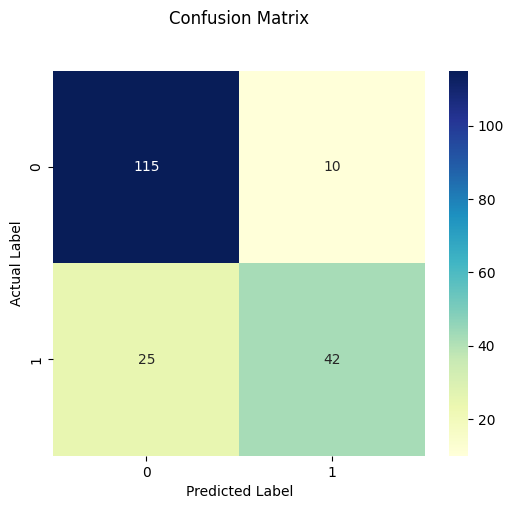

In [46]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Load the dataset
pima = pd.read_csv("pima-indians-diabetes.csv")

# Ensure column names have no extra spaces
pima.columns = pima.columns.str.strip()

# Print column names to verify
print("Dataset columns:", pima.columns)

# Select correct feature names based on actual column names
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
X = pima[feature_cols]  # Features
y = pima['Outcome']  # Target variable

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model
logreg = LogisticRegression(random_state=16, max_iter=500)
logreg.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC curve

# Compute Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Compute Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print Performance Metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion Matrix', y=1.1)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

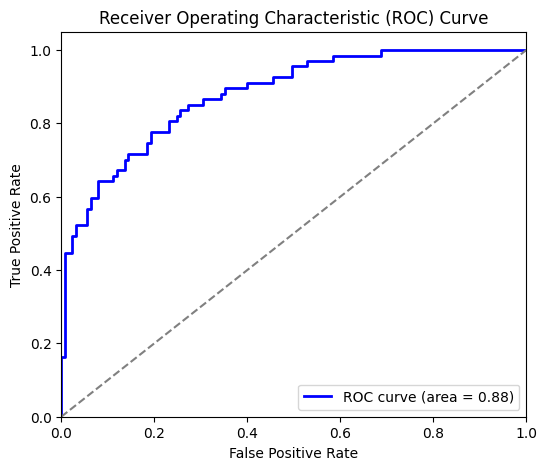

In [47]:
# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()